In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

/var/folders/4f/xq7119ld627_2wyd6dkmwl0m0000gn/T/ipykernel_49144/4000999958.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df1_temp = pd.read_csv('https://raw.githubusercontent.com/ghazafm/SocialMediaSentiment/main/Datasets/labeled%20data/Anies%20Baswedan.csv',encoding= 'ISO-8859-1')
df_anis = pd.read_csv('https://raw.githubusercontent.com/ghazafm/SocialMediaSentiment/main/Datasets/original%20data/Anies%20Baswedan.csv',encoding= 'ISO-8859-1')
df2_temp = pd.read_csv('https://raw.githubusercontent.com/ghazafm/SocialMediaSentiment/main/Datasets/labeled%20data/Prabowo%20Subianto.csv',encoding= 'ISO-8859-1')
df_prabowo = pd.read_csv('https://raw.githubusercontent.com/ghazafm/SocialMediaSentiment/main/Datasets/original%20data/Prabowo%20Subianto.csv',encoding= 'ISO-8859-1')
df3_temp = pd.read_csv('https://raw.githubusercontent.com/ghazafm/SocialMediaSentiment/main/Datasets/labeled%20data/Ganjar%20Pranowo.csv',encoding= 'ISO-8859-1')
df_ganjar = pd.read_csv('https://raw.githubusercontent.com/ghazafm/SocialMediaSentiment/main/Datasets/original%20data/Ganjar%20Pranowo.csv',encoding= 'ISO-8859-1')

In [3]:
df_anis['label'] = df1_temp['label']
df_prabowo['label'] = df2_temp['label']
df_ganjar['label'] = df3_temp['label']

df_anis = df_anis[['Tweet','label']]
df_prabowo = df_prabowo[['Tweet','label']]
df_ganjar = df_ganjar[['Tweet','label']]

In [4]:
df_anis.head()
df_prabowo.head()
df_ganjar.head()

,Tweet,label
0,ganjar makin banyak dukungan kali kini dukunga...,Positive
1,ojoo lali yooo yang cerdas pilih ganjar pranowo,Positive
2,orang cerdas dukung den baguse ganjar pranowo,Positive
3,kita percaya ganjar pranowo adalah anugerah al...,Positive
4,rakyat cerdas dukung den baguse ganjar pranowo,Positive


In [5]:
df_anis.describe().T

,count,unique,top,freq
Tweet,9934,8899,anies presiden,76
label,9997,2,Positive,6454


In [6]:
df_prabowo.describe().T

,count,unique,top,freq
Tweet,9912,6815,prabowo presiden,109
label,10000,2,Positive,7369


In [7]:
df_ganjar.describe().T

,count,unique,top,freq
Tweet,9885,7905,makganjar sulawesi selatan berbagi kebaikan,59
label,10000,2,Positive,7831


In [8]:
df_anis.tail(20)

,Tweet,label
9980,catetttttt yee druunn asmara anies didu saewad...,Positive
9981,anies baswedan untuk indonesia indonesia bangk...,Positive
9982,ini thn yg lalu pandangan dan narasinya sudah ...,Negative
9983,tahun politik mulai memanas sindir sanasini ya...,Positive
9984,th pak anies baswedan jadi presiden ex kader n...,Negative
9985,waras anies presiden,Negative
9986,anies baswedan insyaallah presiden di dan bagi...,Positive
9987,semoga allah swt mengangkat derajat bang anies...,Negative
9988,anies baswedan itu mengayomi seluruh lapisan m...,Positive
9989,survei warga jakarta pilih anies baswedan jadi...,Negative


In [9]:
df_anis.duplicated().tail(20)

9980     True
9981    False
9982    False
9983    False
9984    False
9985     True
9986    False
9987    False
9988    False
9989     True
9990    False
9991    False
9992    False
9993    False
9994     True
9995    False
9996    False
9997    False
9998    False
9999    False
dtype: bool

In [10]:
df_anis.dropna(subset=['Tweet'], inplace=True)
df_anis.dropna(subset=['label'], inplace=True)
df_anis.drop_duplicates(subset=['Tweet'], inplace=True)

df_prabowo.dropna(subset=['Tweet'], inplace=True)
df_prabowo.dropna(subset=['label'], inplace=True)
df_prabowo.drop_duplicates(subset=['Tweet'], inplace=True)

df_ganjar.dropna(subset=['Tweet'], inplace=True)
df_ganjar.dropna(subset=['label'], inplace=True)
df_ganjar.drop_duplicates(subset=['Tweet'], inplace=True)

In [11]:
df_anis.describe().T

,count,unique,top,freq
Tweet,8896,8896,info anies presiden,1
label,8896,2,Positive,5839


In [12]:
df_prabowo.describe().T

,count,unique,top,freq
Tweet,6815,6815,gemira dan semeton muslim bali deklarasi dukun...,1
label,6815,2,Positive,5059


In [13]:
df_ganjar.describe().T

,count,unique,top,freq
Tweet,7905,7905,ganjar makin banyak dukungan kali kini dukunga...,1
label,7905,2,Positive,6265


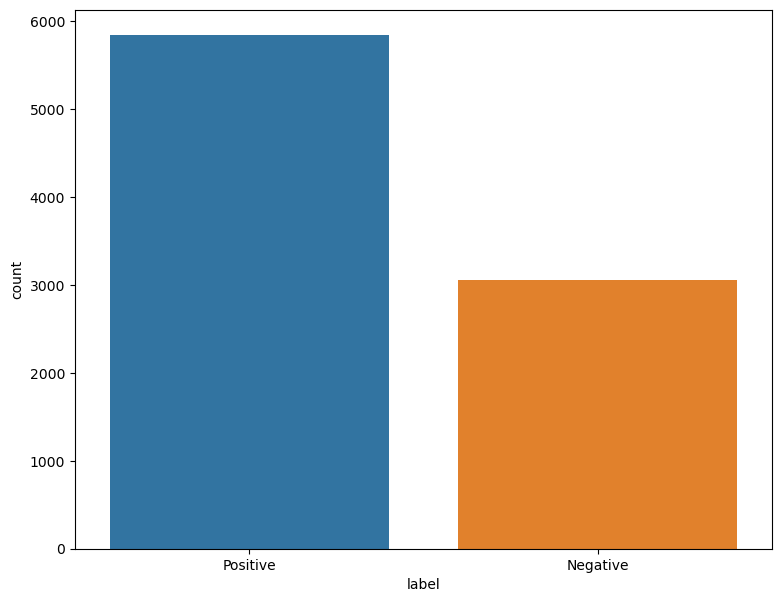

In [14]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x = 'label', hue ="label", data=df_anis)
plt.show()

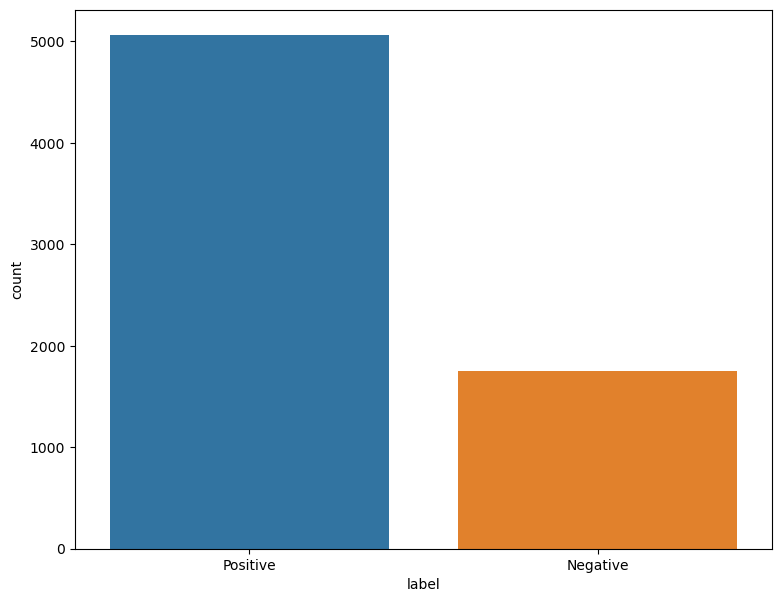

In [15]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x = 'label', hue ="label", data=df_prabowo)
plt.show()

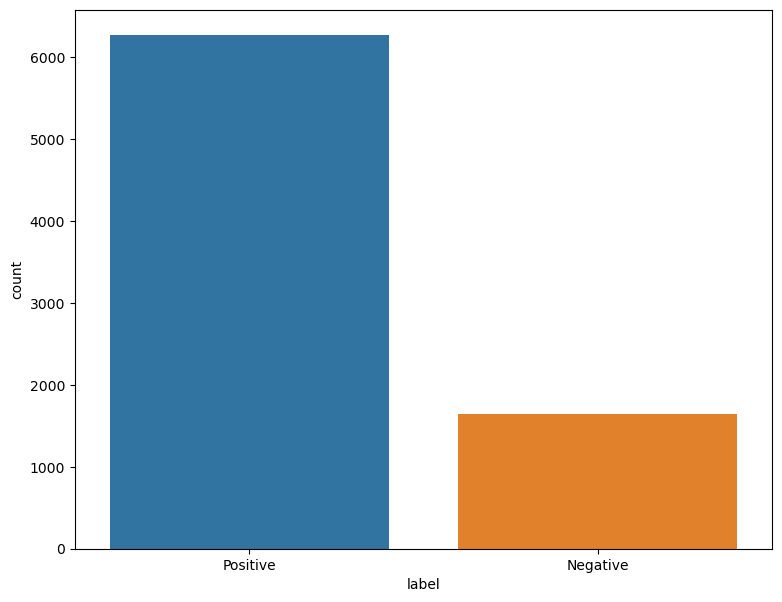

In [16]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x = 'label', hue ="label", data=df_ganjar)
plt.show()

In [17]:
pd.crosstab(df_anis['label'], df_anis['label'])

label,Negative,Positive
label,,
Negative,3057,0
Positive,0,5839


In [18]:
df_anis.isna().sum()

Tweet    0
label    0
dtype: int64

In [19]:
df_prabowo.isna().sum()

Tweet    0
label    0
dtype: int64

In [20]:
df_ganjar.isna().sum()

Tweet    0
label    0
dtype: int64

In [21]:
anis_p = df_anis[df_anis['label']=='Positive']
anis_n = df_anis[df_anis['label']=='Negative']

In [22]:
print(anis_p.shape,anis_n.shape)

(5839, 2) (3057, 2)


In [23]:
anis_n.sample(2)

,Tweet,label
1423,gerombolan kadrun pimpinan hrs disetiap cerama...,Negative
5104,anies bismillah presiden ri,Negative


In [24]:
anis_n.Tweet.sample(5)

8187    bentrokan di morowali buktikan pemerintah lema...
1380    terus debat terbuka dalam acara apa ya debat c...
408                        gak akandan otak anda kejauhan
1570     emang elu tau drmn klo dia licikah elu nya aj...
5307    mana bisa nangkap lah wong ga punya bukti kala...
Name: Tweet, dtype: object

Undersampling random (sample)

In [25]:
anis_p = df_anis[df_anis['label']=='Positive']
anis_n = df_anis[df_anis['label']=='Negative']
prabowo_p = df_prabowo[df_prabowo['label']=='Positive']
prabowo_n = df_prabowo[df_prabowo['label']=='Negative']
ganjar_p = df_ganjar[df_ganjar['label']=='Positive']
ganjar_n = df_ganjar[df_ganjar['label']=='Negative']

anis_p.label.value_counts()

label
Positive    5839
Name: count, dtype: int64

In [26]:
anis_temp = anis_p.sample(anis_n.label.count())
anis_under = pd.concat([anis_temp,anis_n],axis=0)

print("random under sampling: ")
print(anis_under.label.value_counts())

random under sampling: 
label
Positive    3057
Negative    3057
Name: count, dtype: int64


In [27]:
prabowo_temp = prabowo_p.sample(prabowo_n.label.count())
prabowo_under = pd.concat([prabowo_temp,prabowo_n],axis=0)

print("random under sampling: ")
print(prabowo_under.label.value_counts())

random under sampling: 
label
Positive    1756
Negative    1756
Name: count, dtype: int64


In [28]:
ganjar_temp = ganjar_p.sample(ganjar_n.label.count())
ganjar_under = pd.concat([ganjar_temp,ganjar_n],axis=0)

print("random under sampling: ")
print(ganjar_under.label.value_counts())

random under sampling: 
label
Positive    1640
Negative    1640
Name: count, dtype: int64


Oversampling random (sample)

In [29]:
anis_temp = anis_n.sample(anis_p.label.count(), replace=True)
anis_over = pd.concat([anis_p,anis_temp],axis=0)

print("random under sampling: ")
print(anis_over.label.value_counts())

random under sampling: 
label
Positive    5839
Negative    5839
Name: count, dtype: int64


In [30]:
prabowo_temp = prabowo_n.sample(prabowo_p.label.count(), replace=True)
prabowo_over = pd.concat([prabowo_p,prabowo_temp],axis=0)

print("random under sampling: ")
print(prabowo_over.label.value_counts())

random under sampling: 
label
Positive    5059
Negative    5059
Name: count, dtype: int64


In [31]:
ganjar_temp = ganjar_n.sample(ganjar_p.label.count(), replace=True)
ganjar_over = pd.concat([ganjar_p,ganjar_temp],axis=0)

print("random under sampling: ")
print(ganjar_over.label.value_counts())

random under sampling: 
label
Positive    6265
Negative    6265
Name: count, dtype: int64


SMOTE

In [32]:
anis_x = df_anis.drop('label',axis='columns')
anis_y = df_anis['label']

In [33]:
prabowo_x = df_prabowo.drop('label',axis='columns')
prabowo_y = df_prabowo['label']
prabowo_x.shape

(6815, 1)

In [34]:
ganjar_x = df_ganjar.drop('label',axis='columns')
ganjar_y = df_ganjar['label']
ganjar_x.shape

(7905, 1)

In [35]:
keyword = ['anis','anies',]
for i in keyword:
    anis_x['Tweet'] = anis_x['Tweet'].str.replace(i,'')

In [36]:
keyword = ['prabowo',]
for i in keyword:
    prabowo_x['Tweet'] = prabowo_x['Tweet'].str.replace(i,'')

In [37]:
keyword = ['ganjar']
for i in keyword:
    ganjar_x['Tweet'] = ganjar_x['Tweet'].str.replace(i,'')

In [38]:
x_vector = pd.concat([anis_x.sample(4000),prabowo_x.sample(4000),ganjar_x.sample(4000)])
x_vector.shape

(12000, 1)

In [39]:
port_stem = PorterStemmer()

In [40]:
def stemming(content):
    stemmed = re.sub('[^a-z]',' ',content)
    stemmed = stemmed.lower()
    stemmed = stemmed.split()
    stemmed = [port_stem.stem(word) for word in stemmed if not word in stopwords.words('indonesian')]
    stemmed = ' '.join(stemmed)
    return stemmed

In [41]:
x_vector['Tweet'] = x_vector['Tweet'].apply(stemming)

In [42]:
x_vector.sample(10)

,Tweet
6572,maju negerinya sejahtera rakyatnya
4445,cuplikan kegiatan santri dukung alhamdulillah ...
3848,fix calonkan heru presiden terbukti kerjanya g...
7561,anjg iya yg presiden
7728,kawal presiden pranowo
3926,sauya nbyl yanti ekaputri pa banget bergandeng...
5842,negarawan sejati peduli rakyat amp masyarakat ...
4777,ip merili survei terbaru terkait elektabilita ...
9929,mak dihati presidenku
3869,partai gerindra posisi subianto diusung calon ...


In [43]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_vector.values.ravel())

TfidfVectorizer()

In [44]:
type(x_vector)
type(anis_x)

pandas.core.frame.DataFrame

In [45]:
anis_x = vectorizer.transform(anis_x.values.ravel())
anis_x = anis_x.toarray()

prabowo_x = vectorizer.transform(prabowo_x.values.ravel())
prabowo_x = prabowo_x.toarray()

ganjar_x = vectorizer.transform(ganjar_x.values.ravel())
ganjar_x = ganjar_x.toarray()

In [46]:
anis_x = pd.DataFrame(anis_x)
prabowo_x = pd.DataFrame(prabowo_x)
ganjar_x = pd.DataFrame(ganjar_x)

In [47]:
anis_x.shape

(8896, 16825)

In [48]:
x = pd.concat([anis_x,prabowo_x,ganjar_x])
y = pd.concat([anis_y,prabowo_y,ganjar_y])

In [49]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

label
Positive    17163
Negative    17163
Name: count, dtype: int64

In [50]:
y_sm

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
34321    Negative
34322    Negative
34323    Negative
34324    Negative
34325    Negative
Name: label, Length: 34326, dtype: object

Ensemble with undersampling

In [51]:
df_anis.label.value_counts()

label
Positive    5839
Negative    3057
Name: count, dtype: int64

In [52]:
anis_x = df_anis.drop('label',axis='columns')
anis_y = df_anis['label']

In [53]:
prabowo_x = df_prabowo.drop('label',axis='columns')
prabowo_y = df_prabowo['label']

In [54]:
ganjar_x = df_ganjar.drop('label',axis='columns')
ganjar_y = df_ganjar['label']

In [55]:
anis_x_train, anis_x_test, anis_y_train, anis_y_test = train_test_split(anis_x, anis_y, test_size=0.2, random_state=42, stratify= anis_y)
prabowo_x_train, prabowo_x_test, prabowo_y_train, prabowo_y_test = train_test_split(prabowo_x, prabowo_y, test_size=0.2, random_state=42, stratify= prabowo_y)
ganjar_x_train, ganjar_x_test, ganjar_y_train, ganjar_y_test = train_test_split(ganjar_x, ganjar_y, test_size=0.2, random_state=42, stratify= ganjar_y)

In [56]:
print(anis_y_train.value_counts().Positive / anis_y_train.value_counts().Negative )
print(anis_y_train.value_counts())


1.9104294478527608
label
Positive    4671
Negative    2445
Name: count, dtype: int64


In [57]:
print(prabowo_y_train.value_counts().Positive / prabowo_y_train.value_counts().Negative )
print(prabowo_y_train.value_counts())

2.8804270462633452
label
Positive    4047
Negative    1405
Name: count, dtype: int64


In [58]:
print(ganjar_y_train.value_counts().Positive / ganjar_y_train.value_counts().Negative )
print(ganjar_y_train.value_counts())

3.8201219512195124
label
Positive    5012
Negative    1312
Name: count, dtype: int64


In [59]:
df_anis_temp = anis_x_train.copy()
df_anis_temp['label'] = anis_y_train

In [60]:
df_anis_p = df_anis_temp[df_anis_temp.label == "Positive"]
df_anis_n = df_anis_temp[df_anis_temp.label == "Negative"]

In [61]:
df_anis_p.sample(len(df_anis_n)).shape

(2445, 2)

In [62]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    
    x_train = df_train.drop('label')
    y_train = df_train['label']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.2, stratify=y_sm, random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression(max_iter=2000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [65]:
# Accuracy score
predict = model.predict(x_test)
accuracy = accuracy_score(y_test,predict)

In [66]:
print(accuracy)

0.8402272065249053


In [67]:
contoh = ['tak bertanggung jawab atas apa yang dilakukan apakah ini calon pemimpin masa depan',
'waras anies presiden',
'pengakuan jokowi bias makna jika tak akui pembantaian laskar fpi sebagai pelanggaran ham kamis jokowi blacklist pdip kidult lawan rhoma irama riska gus muhaimin resign',
'Partai dinasti itu buat mantan presiden besok',
'Jadi maunya gubernur jateng, walikota depok, atau gubernur DKI?  Atau mau jadi presiden aja?  Terserah negara punya keluarga mu',
'Kalian simak MANTAN PRESIDEN bicara ya biar jgn sesat jalan kalian',
'Udah serius nyimak Video Pidato Pak Presiden di Tiktok ujung nya bikin ngakak',
'dingin banget, alergi gua kambuh',
'Ada Potensi Cawe-Cawe Presiden di Pilkada Jakarta',
'Sejak awal proses pemilihan presiden dan wakil presiden keputusan MK menguntungkan salah satu paslon melalui usia',
'Pj Gubernur Fatoni Dampingi Presiden Jokowi Membuka Muktamar',
'mari memilih dengan bijak',
]
contoh = vectorizer.transform(contoh)
predict = model.predict(contoh)
print(predict)

['Negative' 'Negative' 'Negative' 'Positive' 'Negative' 'Positive'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Positive']


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
# Accuracy score
predict = model.predict(x_test)
accuracy = accuracy_score(y_test,predict)

In [70]:
print(accuracy)

0.878386251092339


In [72]:
contoh = ['tak bertanggung jawab atas apa yang dilakukan apakah ini calon pemimpin masa depan',
'waras anies presiden',
'pengakuan jokowi bias makna jika tak akui pembantaian laskar fpi sebagai pelanggaran ham kamis jokowi blacklist pdip kidult lawan rhoma irama riska gus muhaimin resign',
'Partai dinasti itu buat mantan presiden besok',
'Jadi maunya gubernur jateng, walikota depok, atau gubernur DKI?  Atau mau jadi presiden aja?  Terserah negara punya keluarga mu',
'Kalian simak MANTAN PRESIDEN bicara ya biar jgn sesat jalan kalian',
'Udah serius nyimak Video Pidato Pak Presiden di Tiktok ujung nya bikin ngakak',
'dingin banget, alergi gua kambuh',
'Ada Potensi Cawe-Cawe Presiden di Pilkada Jakarta',
'Sejak awal proses pemilihan presiden dan wakil presiden keputusan MK menguntungkan salah satu paslon melalui usia',
'Pj Gubernur Fatoni Dampingi Presiden Jokowi Membuka Muktamar',
'baik',
]
contoh = vectorizer.transform(contoh)
predict = model.predict(contoh)
print(predict)

['Negative' 'Negative' 'Negative' 'Positive' 'Positive' 'Negative'
 'Negative' 'Positive' 'Negative' 'Negative' 'Positive' 'Negative']
